In [90]:
import matplotlib
matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap
import numpy as np
from pylab import *
from scipy.io import netcdf
import numpy.ma as ma
import string
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid.inset_locator import mark_inset
from mpl_toolkits.axes_grid.anchored_artists import AnchoredSizeBar
from matplotlib.ticker import LinearLocator
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [102]:
#ASSIGN TICK SIZE AND MAKE ALL TEXT TIMES NEW ROMAN
#mpl.rc("ytick",labelsize=9)
#mpl.rc("xtick",labelsize=9)
#mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})

def calc_cice_var_ave(start_year, num_years, start_month, end_month, var_name):

        conc_av = ma.masked_all((129,104))

        yinx=0
        for year in range(start_year, start_year+num_years, 1):
                minx=0
                for month in range(start_month, end_month+1, 1):

                        month1 ='%02d' %(month)
                        date = str(year)+'_'+month1
                        if var_name == 'var1':
                                filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/NHemi_monthly/u_'+date
                                print(filepath)
                                #filepath = '/glusterfs/cpom/users/xb904477/DATA/Pathfinder/SHemi_m/DATA_Monthly/u_'+date
                        elif var_name == 'var2':
                                filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/NHemi_monthly/v_'+date
                                #filepath = '/glusterfs/cpom/users/xb904477/DATA/Pathfinder/SHemi_m/DATA_Monthly/v_'+date

                        f = netcdf.netcdf_file(filepath+'.nc', 'r')
                        var = f.variables[var_name][0,:, :]
                        var = ma.masked_outside(var, -1000000, 100000)
                        var = ma.filled(var, 0)

                        conc_av[:, :]= var
                        minx=minx+1
                yinx = yinx+1

        return conc_av


#THE SEASONAL TEXT STRING THAT ARE DISPLAYED ON EACH PANEL
def month_str(start_month, end_month):
        month_strings = ['J','F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D' ]
        month_lab = []
        for x in range(start_month - 1, end_month, 1):
                month_lab.append(month_strings[x])

        month_out = "".join(month_lab)
        return month_out

#CALCULATE THE LINEAR TREND IN A VARIABLE AGAINST YEARS
def var_trend(var, num_years):

        years = np.arange(num_years)
        trend = np.zeros((129, 104))
        sig_a = np.zeros((129, 104))
        r_a = np.zeros((129, 104))
        int_a = np.zeros((129, 104))


        for i in xrange(129):
                        for j in range(104):
                                slope, intercept, r, prob, stderr = stats.linregress(years,var[:, i, j])
                                trend[i, j] = slope
                                sig_a[i, j] = 100*(1-prob)
                                r_a[i, j] = r
                                int_a[i, j] = intercept

        return trend, sig_a, r_a, int_a



In [104]:
del uvel
del vvel
del wind_mag
#CHOOSE MAP PROJECTION
#m = Basemap(projection='spaeqd',boundinglat=-55,lon_0=180,resolution='l')
m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')

filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/NHemi_monthly/u_2016_11'
#filepath = '/glusterfs/cpom/users/xb904477/GAIA_BU/pq232393/DRAG_SH/cice_v4.1_r647_1proc_form/rundir0_20161028_nodrag/history/iceh.1980-07'
f = netcdf.netcdf_file(filepath+'.nc', 'r')
#file1 = 'new15'

lons =f.variables['TLON'][:, :]
lats =f.variables['TLAT'][:, :]
xpts,ypts = m(lons,lats)
#xpts = xpts.T
#ypts = ypts.T

#CHOSE RANGE OF CLIMATOLOGY
start_year = 2017
num_years = 1
end_year = start_year+num_years-1

#ASSIGN AN EMPTY ARRAY FOR SEASONAL U VELOCITIES
uvel = -1000*np.ones((129, 104))

uvel[:, :] = calc_cice_var_ave(start_year, num_years, 4, 4, 'var1')

#ASSIGN AN EMPTY ARRAY FOR SEASONAL V VELOCITIES
vvel = -1000*np.ones((129, 104))

vvel[:, :] = calc_cice_var_ave(start_year, num_years, 4, 4, 'var2')


#THE WIND SPEED
#wind_map = np.zeros((4,129, 104))
wind_mag = ma.masked_all((129, 104))
wind_mag = sqrt(uvel**2 + vvel**2)
wind_mag = ma.masked_outside(wind_mag, 0.0001, 1)


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/NHemi_monthly/u_2017_04


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


saving


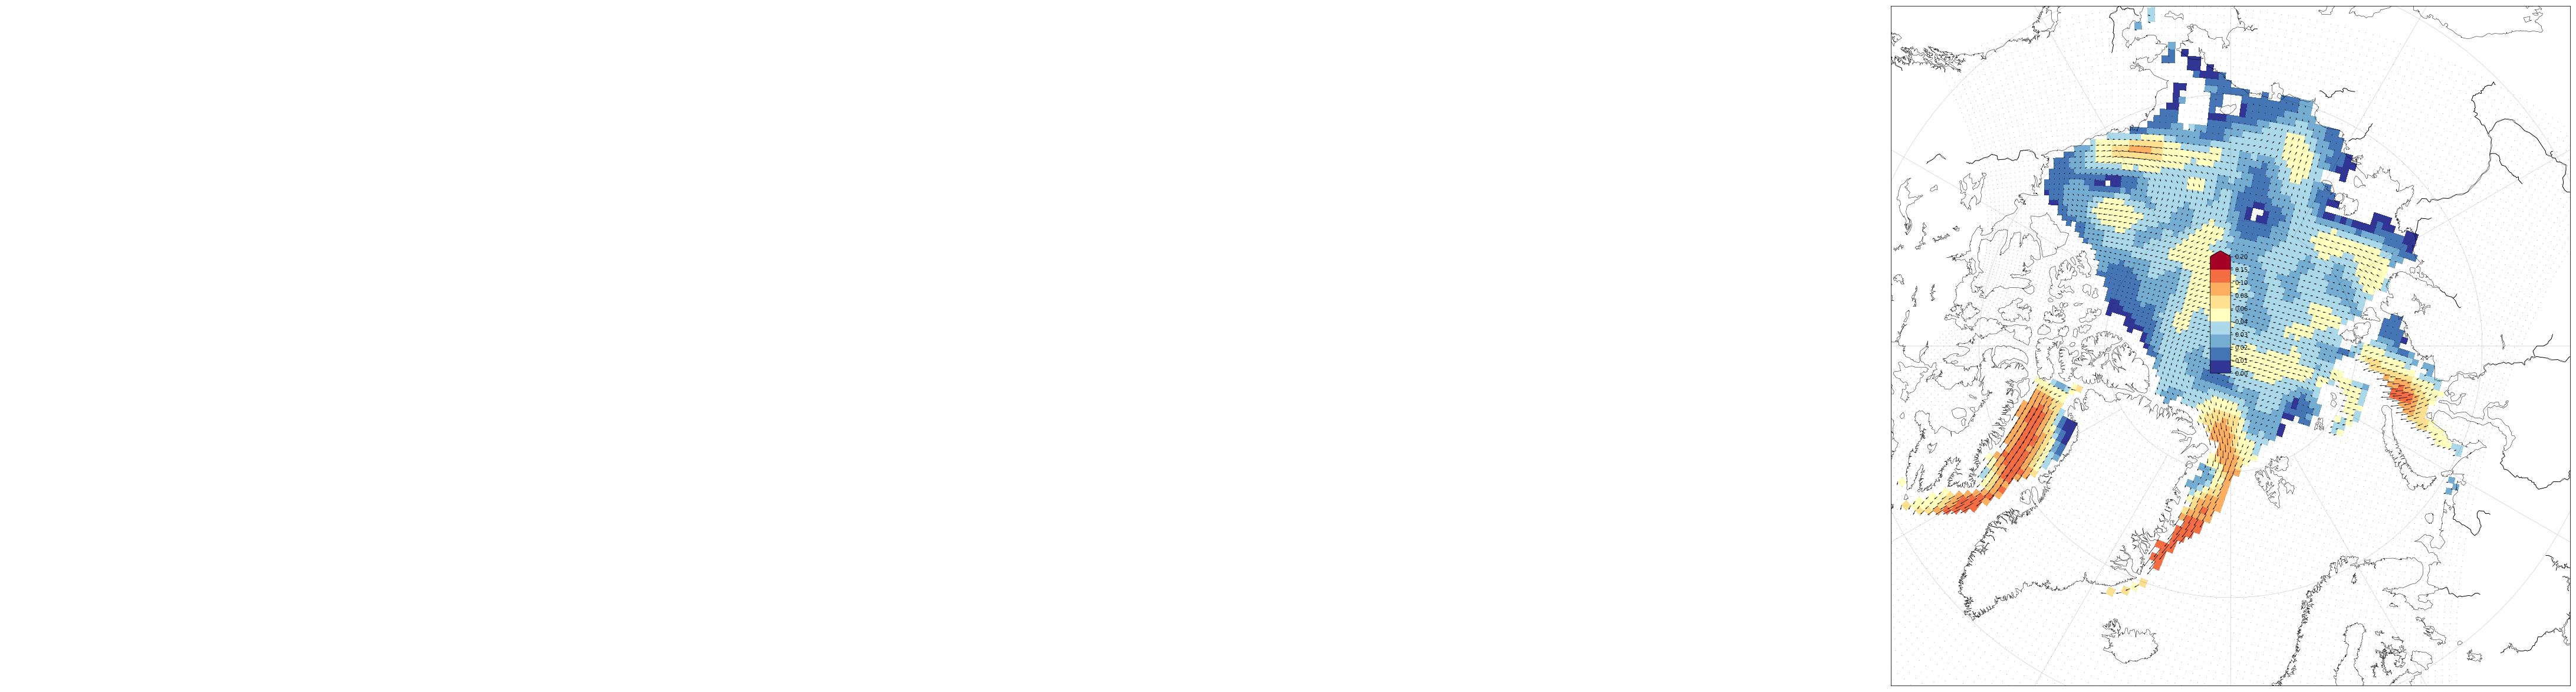

In [93]:
#CALC MONTH STRINGS
m_str = []
for x in range(0, 4, 1):
        m_str.append(month_str((x*3)+1,(x*3)+3))


# LANDMASK ETC
rtopo=0
if rtopo==1:
  etopo=netcdf.netcdf_file('/glusterfs/cpom/users/xb904477/GAIA_BU/pq232393/PYTHON/RTopo105b_50S_2d_mask.nc', 'r')
  lontopo = etopo.variables['lon']
  lattopo = etopo.variables['lat']
  xtopo, ytopo = m(*np.meshgrid(lontopo[:], lattopo[:]))
  icerock = etopo.variables['amask'][:]

#minval = 0
#maxval = 0.2 
#xticks = [minval, maxval]

axesname = ['ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8']

clevs = [0,0.01,0.02,0.03,0.04,0.06,0.08,0.1,0.15,0.2]

clf()
fig = figure(figsize=(16,16))
for plotnum in range(1):
# 2 BY 2 FIGURE FOR EACH SEASON 
        vars()[axesname[plotnum]] = subplot(1,1,plotnum+1)

        if rtopo==1:
                m.contourf(xtopo, ytopo, icerock, levels=[0.5, 1.5, 2.5], colors=['#666666', '#EEEEEE'], zorder=2)

        cmap = mpl.colors.ListedColormap(['#313695','#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027','#a50026'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#        m.drawparallels(np.arange(-90,-40,10), linewidth = 0.25, linestyle='solid', zorder=3)
#        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=3)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        # PRINT THE WIND MAGNITUDE. YOU COULD ALWAYS CHANGE THIS TO JUST MERIDONAL OR ZONAL IF YOU WANTED BY CALLING
        # THE FUNCTION THAT CONVERTS I/J TO UZ, VM
        #im1 = m.pcolormesh(xpts, ypts, wind_mag[plotnum],vmin=minval, vmax = maxval,cmap=plt.cm.jet, zorder=1)
        im1 = m.pcolormesh(xpts, ypts, ma.masked_where((lats>-60) & (wind_mag<0.005),wind_mag), cmap=cmap, norm = norm)

        #QUIVER IS FOR THE ARROWS. THE NUMBER MEANS ONLY PLOT EVERY (3RD) POINT. YOU CAN CHANGE THIS.
        #SCALE AND WIDTH AFFECT THE SIZE OF THE ARROWS AS A FUNCTION OF THE VECTOR MAGNITUDE
        Q = m.quiver(xpts, ypts, uvel, vvel, units='inches',scale=0.5 , width = 0.01, zorder = 4)
        if plotnum==2:
                #ASSIGN A LEGEND OF THE VECTOR TO THE THIRD WINDOW (PYTHON STARTS TO INDEX AT 0)
                xS, yS = m(145, -52)
                qk = quiverkey(Q, xS, yS, 0.2, r'0.2 $\rm{ms^{-1}}$',  coordinates='data', zorder = 4)
        xlab,ylab = m(90, 85)  # get desired location in map projection coordinate
        ax = gca()

        # PRINT SEASONAL LABEL
        xlab,ylab = m(270, -87)  # get desired location in map projection coordinates
        ax = gca()
        ax.text(xlab,ylab,m_str[plotnum], color='w',size='large', zorder = 9) # see axes.text docstring for **kwargs

# ADD JUST ONE COLOURBAR TO THE FIGURE WINDOW
cax = fig.add_axes([0.47, 0.46, 0.03, 0.18])
cbar = colorbar(im1,cax=cax,orientation='vertical', extend='max')
cbar.set_ticks(clevs)
#cbar.set_label(r'$\rm{ms^{-1}}$', rotation=0)
#cbar.set_ticks((minval, maxval))
subplots_adjust(wspace = 0, hspace = 0, bottom = 0, left = 0, right = 1, top = 1)

print('saving')
savefig('/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/Figs/'+str(start_year)+'-'+str(start_year+num_years-1)+'ice_motion_seasons_pathfinder.png', dpi=300)


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


saving


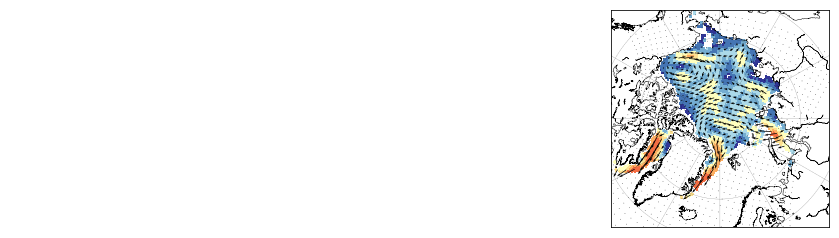

In [105]:


clevs = [0,0.01,0.02,0.03,0.04,0.06,0.08,0.1,0.15,0.2]

clf()

cmap = mpl.colors.ListedColormap(['#313695','#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027','#a50026'])
bounds = clevs
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
m.drawcoastlines(linewidth=0.5)

# PRINT THE WIND MAGNITUDE. YOU COULD ALWAYS CHANGE THIS TO JUST MERIDONAL OR ZONAL IF YOU WANTED BY CALLING
# THE FUNCTION THAT CONVERTS I/J TO UZ, VM
#im1 = m.pcolormesh(xpts, ypts, wind_mag[plotnum],vmin=minval, vmax = maxval,cmap=plt.cm.jet, zorder=1)
im1 = m.pcolormesh(xpts, ypts, ma.masked_where((lats>-60) & (wind_mag<0.005),wind_mag), cmap=cmap, norm = norm)

#QUIVER IS FOR THE ARROWS. THE NUMBER MEANS ONLY PLOT EVERY (3RD) POINT. YOU CAN CHANGE THIS.
#SCALE AND WIDTH AFFECT THE SIZE OF THE ARROWS AS A FUNCTION OF THE VECTOR MAGNITUDE
Q = m.quiver(xpts[::3,::3], ypts[::3,::3], uvel[::3,::3], vvel[::3,::3], units='inches',scale=0.5 , width = 0.01, zorder = 4)
#if plotnum==2:
#ASSIGN A LEGEND OF THE VECTOR TO THE THIRD WINDOW (PYTHON STARTS TO INDEX AT 0)
#xS, yS = m(145, -52)
#qk = quiverkey(Q, xS, yS, 0.2, r'0.2 $\rm{ms^{-1}}$',  coordinates='data', zorder = 4)
xlab,ylab = m(90, 85)  # get desired location in map projection coordinate
ax = gca()

# PRINT SEASONAL LABEL
xlab,ylab = m(270, -87)  # get desired location in map projection coordinates
ax = gca()
ax.text(xlab,ylab,m_str[plotnum], color='w',size='large', zorder = 9) # see axes.text docstring for **kwargs

# ADD JUST ONE COLOURBAR TO THE FIGURE WINDOW
cax = fig.add_axes([0.47, 0.46, 0.03, 0.18])
cbar = colorbar(im1,cax=cax,orientation='vertical', extend='max')
cbar.set_ticks(clevs)
#cbar.set_label(r'$\rm{ms^{-1}}$', rotation=0)
#cbar.set_ticks((minval, maxval))
#subplots_adjust(wspace = 0, hspace = 0, bottom = 0, left = 0, right = 1, top = 1)

print('saving')
savefig('/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/pathfinder_2017/Figs/'+str(start_year)+'-'+str(start_year+num_years-1)+'ice_motion_seasons_pathfinder_1plot.png', dpi=300)


In [85]:
ylab

3002261.6056864206

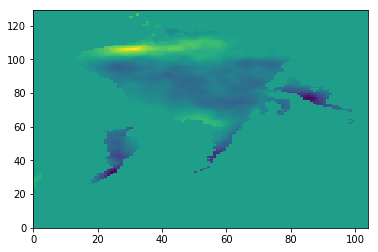

In [37]:
plt.pcolor(uvel)

In [41]:
uvel.shape

(129, 104)

In [43]:
wind_mag.shape

(129, 104)

In [45]:
plotnum

0

In [46]:
wind_mag[plotnum].shape

(104,)

In [50]:
test=ma.masked_where((lats>60) & (wind_mag<0.005),wind_mag)

In [51]:
test.shape

(129, 104)

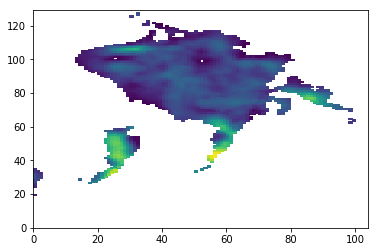

In [52]:
plt.pcolor(test)

In [64]:
mag.shape

(129, 104)

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3420: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


TypeError: Dimensions of C (129, 104) are incompatible with X (129) and/or Y (104); see help(pcolormesh)

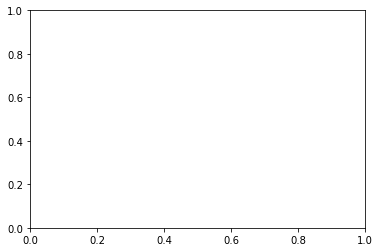

In [55]:
im1 = m.pcolormesh(xpts, ypts, ma.masked_where((lats>60) & (wind_mag<0.005),wind_mag), cmap=cmap, norm = norm)

In [56]:
xpts.shape

(104, 129)